## Plot distribution of haplotype frequencies to determien threshold for filtering

...or whether I should filter at all.

Going to start with the filtering script I wrote, and build on that to make the plot.

In [59]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2


In [60]:
from __future__ import division
import sys
import argparse
import numpy as np
from operator import itemgetter

In [61]:
genfile = open("trans_tags_gp_fMV_sansreps_20170324.csv", "r") # open genotypes file for reading
genfile_lines = genfile.readlines()
gen_header = genfile_lines[0] # get first line, header
restlines = genfile_lines[1:] # skip first line to get to exclude header

In [62]:
threshold = .05 # set MAF cutoff

In [63]:
kept_count = 0
lost_count = 0

In [64]:
# maf_dict is a temporary dictionary that stores alleles as keys and allele counts as values
# the script then uses the dictionary to calculate frequencies, for filtering

freqs_list_forplot = []

locus_list = []
for locusrow in restlines: # iterate across individual genotypes within a locus
    maf_dict = {} # initiate dictionary to store allele frequencies
    rowlist = locusrow.strip().split(",")
    locus = rowlist[0]
    locus_list.append(locus)
    genlist = rowlist[1:]
    gencount = 0 # initiate counter for number of genotypes that aren't missing data
    for genotype in genlist:
        if genotype != "0000":
            gencount += 1
            allele_list = [genotype[0:2],genotype[2:4]] # assumes your genotypes are two digit format
            for allele in allele_list:
                if allele not in maf_dict:
                    maf_dict[allele] = 1
                if allele in maf_dict:
                    oldcount = maf_dict[allele]
                    newcount = oldcount + 1
                    maf_dict[allele] = newcount
    allele_list = maf_dict.keys()
    allele_freq_list = []
    for allele in allele_list: # go through dict, get allele freq, and make dict value a list with freq then count
        allele_count = maf_dict[allele]-1 # not sure where my code is adding an extra 1, so deleting one here as a quick fix
        allele_freq = float(allele_count)/float(gencount*2)
        freqs_list_forplot.append(allele_freq)
        allele_freq_list.append(allele_freq)
        new_value_list = [allele_freq, allele_count]
        maf_dict[allele] = new_value_list
    if all(x > threshold for x in allele_freq_list):
        kept_count += 1
    else:
        lost_count += 1

# Close files
genfile.close()

total_count = kept_count + lost_count
retained_perc = kept_count/total_count

# Report kept/lost to user
print "\nThis script filtered out " + str(lost_count) + " loci, out of a total of " + str(total_count) + " loci."
print "\nYour keptloci file should have " + str(kept_count) + " loci, and your lostloci file should have " + str(lost_count) + " loci."
print "\nYou retained " + str(retained_perc*100)[0:4] + "% of your loci after filtering for minor allele frequency with a threshold of " + str(threshold) + "."



This script filtered out 7315 loci, out of a total of 7448 loci.

Your keptloci file should have 133 loci, and your lostloci file should have 7315 loci.

You retained 1.78% of your loci after filtering for minor allele frequency with a threshold of 0.05.


In [65]:
import matplotlib.pyplot as plt

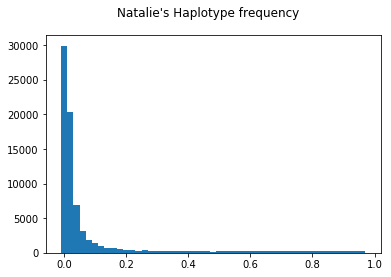

In [66]:
plt.hist(freqs_list_forplot, bins = np.arange(0,1,.02)-.01)
plt.suptitle("Natalie's Haplotype frequency")
plt.show()
plt.close()

## Going to check Mary's for comparison...

In [53]:
cd /home/nclowell/Desktop

/home/nclowell/Desktop


In [54]:
from __future__ import division
import sys
import argparse
import numpy as np
from operator import itemgetter

genfile = open("mary_test.csv", "r") # open genotypes file for reading
genfile_lines = genfile.readlines()
gen_header = genfile_lines[0] # get first line, header
restlines = genfile_lines[1:] # skip first line to get to exclude header

In [55]:
threshold = .05 # set MAF cutoff
kept_count = 0
lost_count = 0

In [56]:
# maf_dict is a temporary dictionary that stores alleles as keys and allele counts as values
# the script then uses the dictionary to calculate frequencies, for filtering

freqs_list_forplot = []

locus_list = []
for locusrow in restlines: # iterate across individual genotypes within a locus
    maf_dict = {} # initiate dictionary to store allele frequencies
    rowlist = locusrow.strip().split(",")
    locus = rowlist[0]
    locus_list.append(locus)
    genlist = rowlist[1:]
    gencount = 0 # initiate counter for number of genotypes that aren't missing data
    for genotype in genlist:
        if genotype != "0000":
            gencount += 1
            allele_list = [genotype[0:2],genotype[2:4]] # assumes your genotypes are two digit format
            for allele in allele_list:
                if allele not in maf_dict:
                    maf_dict[allele] = 1
                if allele in maf_dict:
                    oldcount = maf_dict[allele]
                    newcount = oldcount + 1
                    maf_dict[allele] = newcount
    allele_list = maf_dict.keys()
    allele_freq_list = []
    for allele in allele_list: # go through dict, get allele freq, and make dict value a list with freq then count
        allele_count = maf_dict[allele]-1 # not sure where my code is adding an extra 1, so deleting one here as a quick fix
        allele_freq = float(allele_count)/float(gencount*2)
        freqs_list_forplot.append(allele_freq)
        allele_freq_list.append(allele_freq)
        new_value_list = [allele_freq, allele_count]
        maf_dict[allele] = new_value_list
    if all(x > threshold for x in allele_freq_list):
        kept_count += 1
    else:
        lost_count += 1

# Close files
genfile.close()

total_count = kept_count + lost_count
retained_perc = kept_count/total_count

# Report kept/lost to user
print "\nThis script filtered out " + str(lost_count) + " loci, out of a total of " + str(total_count) + " loci."
print "\nYour keptloci file should have " + str(kept_count) + " loci, and your lostloci file should have " + str(lost_count) + " loci."
print "\nYou retained " + str(retained_perc*100)[0:4] + "% of your loci after filtering for minor allele frequency with a threshold of " + str(threshold) + "."



This script filtered out 3353 loci, out of a total of 5864 loci.

Your keptloci file should have 2511 loci, and your lostloci file should have 3353 loci.

You retained 42.8% of your loci after filtering for minor allele frequency with a threshold of 0.05.


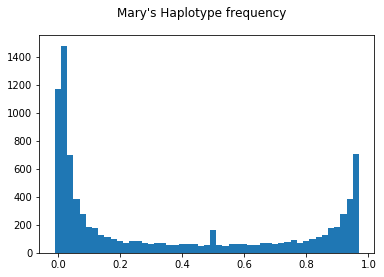

In [57]:
import matplotlib.pyplot as plt

plt.hist(freqs_list_forplot, bins = np.arange(0,1,.02)-.01)
plt.suptitle("Mary's Haplotype frequency")
plt.show()
plt.close()